# Data Visualization

In this lesson, we'll learn two data visualization libraries `matplotlib` and `seaborn`. By the end of this lesson, students will be able to:

- Skim library documentation to identify relevant examples and usage information.
- Apply `seaborn` and `matplotlib` to create and customize relational and regression plots.
- Describe data visualization principles as they relate the effectiveness of a plot.

Just like how we like to import `pandas` as `pd`, we'll import `matplotlib.pyplot` as `plt` and `seaborn` as `sns`.

**Seaborn** is a Python data visualization library based on matplotlib. Behind the scenes, seaborn uses matplotlib to draw its plots. When importing seaborn, it is recommended to call `sns.set_theme()` to apply the recommended seaborn visual style instead of the default matplotlib theme.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

Let's load this uniquely-formatted pokemon dataset.

In [3]:
pokemon = pd.read_csv("pokemon_viz.csv", index_col="Num")
pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Num,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


## Figure-level versus axes-level functions

One way to draw a scatter plot comparing every pokemon's `Attack` and `Defense` stats is by calling `sns.scatterplot`. Because [this plotting function has so many parameters](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), it's good practice to specify **keyword arguments** that tell Python which argument should go to which parameter.

<Axes: xlabel='Attack', ylabel='Defense'>

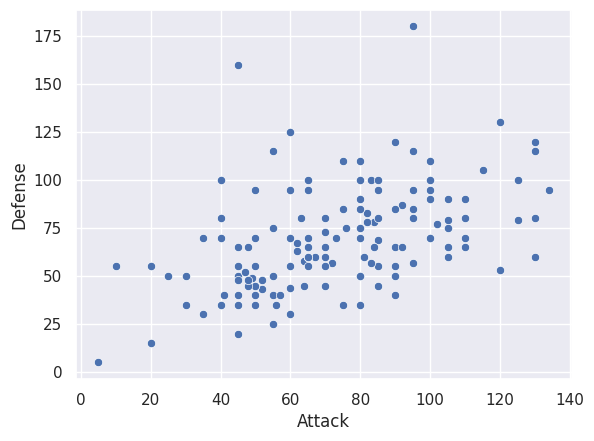

In [4]:
sns.scatterplot(pokemon, x="Attack", y="Defense")

The return type of `sns.scatterplot` is a matplotlib feature called **axes** that can be used to compose multiple plots into a single visualization. We can show two plots side-by-side by placing them on the same axes. For example, we could compare the attack and defense stats for two different groups of pokemon: not-`Legendary` and `Legendary`.

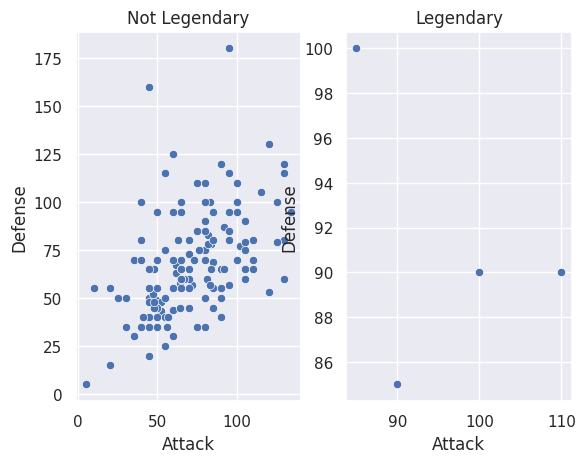

In [4]:
# Nested tuple unpacking!
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title("Not Legendary")
sns.scatterplot(pokemon[~pokemon["Legendary"]], x="Attack", y="Defense", ax=ax1)
ax2.set_title("Legendary")
sns.scatterplot(pokemon[pokemon["Legendary"]], x="Attack", y="Defense", ax=ax2)
fig.show()

Each problem in the plot above can be fixed manually by repeatedly editing and running the code until you get a satisfactory result, but it's a tedious process. Seaborn was invented to make our data visualization experience less tedious. Methods like `sns.scatterplot` are considered **axes-level functions** designed for interoperability with the rest of `matplotlib`, but they come at the cost of forcing you to deal with the tediousness of tweaking matplotlib.

Instead, the recommended way to create plots in seaborn is to use **figure-level functions** like `sns.relplot` as in *relational plot*. Figure-level functions return specialized seaborn objects (such as `FacetGrid`) that are intended to provide more usable results without tweaking.

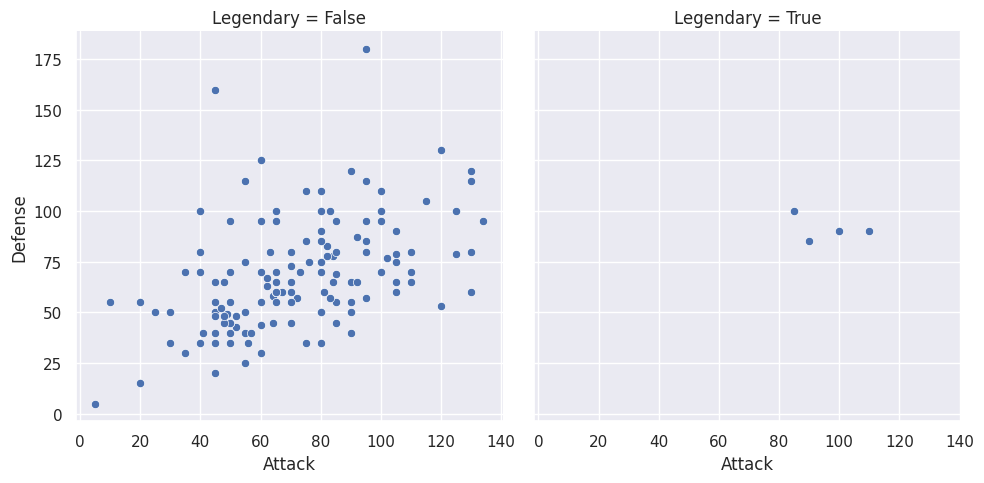

In [5]:
sns.relplot(pokemon, x="Attack", y="Defense", col="Legendary")

By default, relational plots produce scatter plots but they can also produce line plots by specifying the keyword argument `kind="line"`.

Alongside `relplot`, seaborn provides several other useful figure-level plotting functions:

- [`relplot` for **relational plots**](https://seaborn.pydata.org/generated/seaborn.relplot.html), such as scatter plots and line plots.
- [`displot` for **distribution plots**](https://seaborn.pydata.org/generated/seaborn.displot.html), such as histograms and kernel density estimates.
- [`catplot` for **categorical plots**](https://seaborn.pydata.org/generated/seaborn.catplot.html), such as strip plots, box plots, violin plots, and bar plots.
- [`lmplot` for **relational plots with a regression fit**](https://seaborn.pydata.org/generated/seaborn.lmplot.html), such as the scatter plot with regression fit below.

When reading documentation online, it is important to remember that we will only use figure-level plots in this course because they are the recommended approach. On the [relative merits of figure-level functions](https://seaborn.pydata.org/tutorial/function_overview.html#relative-merits-of-figure-level-functions) in the seaborn documentation:

> On balance, the figure-level functions add some additional complexity that can make things more confusing for beginners, but their distinct features give them additional power. The tutorial documentation mostly uses the figure-level functions, because they produce slightly cleaner plots, and we generally recommend their use for most applications. The one situation where they are not a good choice is when you need to make a complex, standalone figure that composes multiple different plot kinds. At this point, it’s recommended to set up the figure using matplotlib directly and to fill in the individual components using axes-level functions.

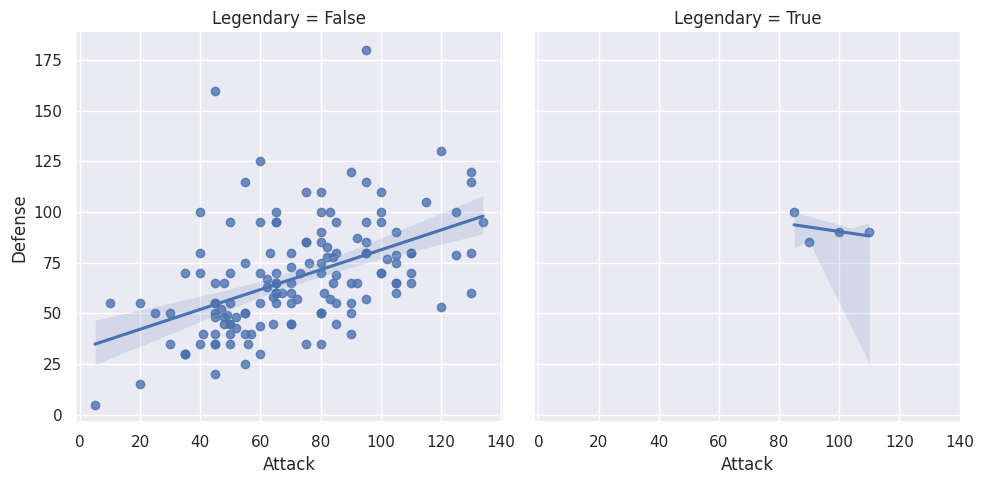

In [6]:
sns.lmplot(pokemon, x="Attack", y="Defense", col="Legendary")

## Customizing a `FacetGrid` plot

`relplot`, `displot`, `catplot`, and `lmplot` all return a `FacetGrid`, a specialized seaborn object that represents a data visualization canvas. As we've seen above, a `FacetGrid` can put two plots side-by-side and manage their axes by removing the y-axis labels on the right plot because they are the same as the plot on the left.

However, there are still many instances where we might want to customize a plot by changing labels or adding titles. We might want to create a bar plot to count the number of each type of pokemon.

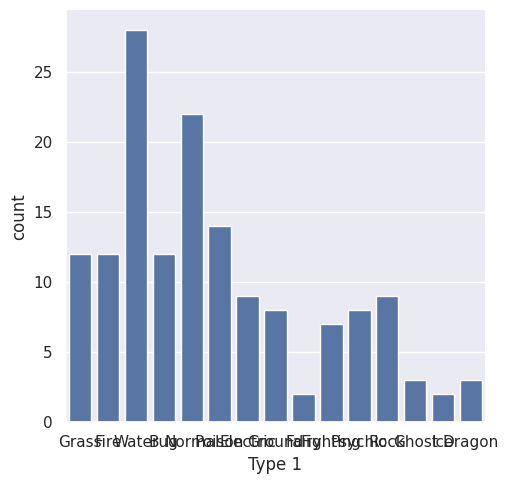

In [7]:
sns.catplot(pokemon, x="Type 1", kind="count")

The pokemon types on the x-axis are hardly readable, the y-axis label "count" could use capitalization, and the plot could use a title. To modify the attributes of a plot, we can assign the returned `FacetGrid` to a variable like `grid` and then call [`tick_params`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.tick_params.html) or [`set`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.set.html#seaborn.FacetGrid.set).

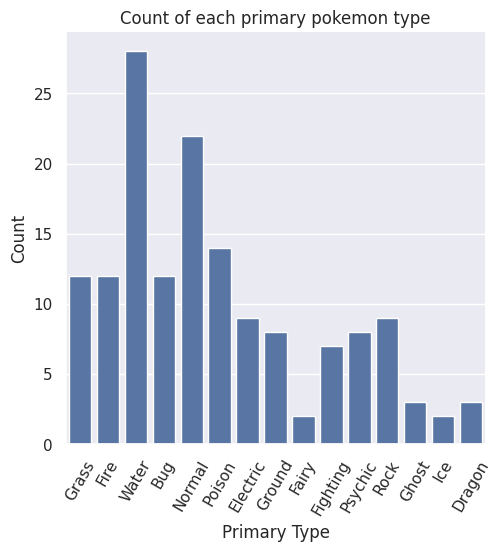

In [8]:
grid = sns.catplot(pokemon, x="Type 1", kind="count")
grid.tick_params(axis="x", rotation=60)
grid.set(title="Count of each primary pokemon type", xlabel="Primary Type", ylabel="Count")

## Practice: Life expectancy versus health expenditure

Seaborn includes a repository of [example datasets](https://github.com/mwaskom/seaborn-data) that we can load into a `DataFrame` by calling `sns.load_dataset`. Let's examine the [Life expectancy vs. health expenditure, 1970 to 2015](https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure?time=earliest..2015) dataset that combines two data sources:

1. The Life expectancy at birth dataset from the [UN World Population Prospects](https://population.un.org/wpp/Download/) (2022): "For a given year, it represents the average lifespan for a hypothetical group of people, if they experienced the same age-specific death rates throughout their lives as the age-specific death rates seen in that particular year."
1. The Health expenditure (2010 int.-$) dataset from [OECD.stat](https://stats.oecd.org/). "Per capita health expenditure and financing in OECD countries, measured in 2010 international dollars."

In [9]:
life_expectancy = sns.load_dataset("healthexp", index_col=["Year", "Country"])
life_expectancy

Spending_USD  Life_Expectancy
Year Country                                     
1970 Germany             252.311             70.6
     France              192.143             72.2
     Great Britain       123.993             71.9
     Japan               150.437             72.0
     USA                 326.961             70.9
...                          ...              ...
2020 Germany            6938.983             81.1
     France             5468.418             82.3
     Great Britain      5018.700             80.4
     Japan              4665.641             84.7
     USA               11859.179             77.0

[274 rows x 2 columns]

Write a `seaborn` expression to create a line plot comparing the `Year` (x-axis) to the `Life_Expectancy` (y-axis) colored with `hue="Country"`.

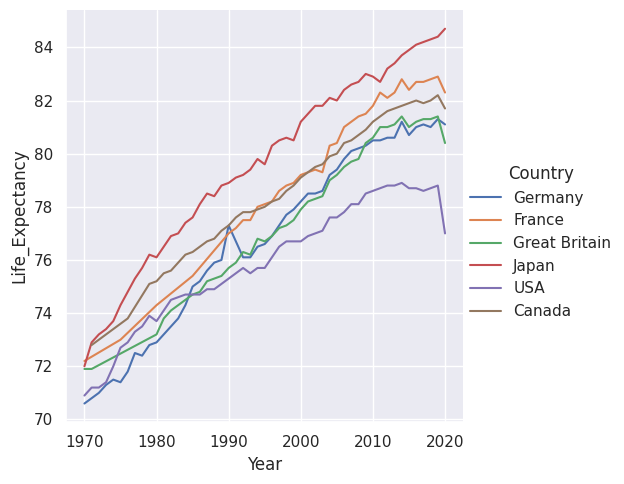

In [11]:
sns.relplot(life_expectancy, x = "Year", y = "Life_Expectancy", hue = "Country", kind = "line")

## What makes bad figures bad?

In chapter 1 of *Data Visualization*, Kieran Hiely explains how data visualization is about communication and rhetoric.

> While it is tempting to simply start laying down the law about what works and what doesn't, the process of making a really good or really useful graph cannot be boiled down to a list of simple rules to be followed without exception in all circumstances. The graphs you make are meant to be looked at by someone. The effectiveness of any particular graph is not just a matter of how it looks in the abstract, but also a question of who is looking at it, and why. An image intended for an audience of experts reading a professional journal may not be readily interpretable by the general public. A quick visualization of a dataset you are currently exploring might not be of much use to your peers or your students.

### Bad taste

Kieran identifies three problems, the first of which is **bad taste**.

<img style="max-width: 100%; max-height: 480px" alt="3-d horizontal bar chart comparing life expectancy across continents with Papyrus font and cute visual style" src="https://socviz.co/assets/ch-01-chartjunk-life-expectancy.png" />

Kieran draws on Edward Tufte's principles (all quoted from Tufte 1983):

- have a properly chosen format and design
- use words, numbers, and drawing together
- display an accessible complexity of detail
- avoid content-free decoration, including chartjunk

In essence, these principles amount to "an encouragement to maximize the 'data-to-ink' ratio." In practice, our plotting libraries like `seaborn` do a fairly good job of providing defaults that generally follow these principles.

### Bad data

The second problem is **bad data**, which can involve either cherry-picking data or presenting information in a misleading way.

> In November of 2016, *The New York Times* reported on some research on people's confidence in the institutions of democracy. It had been published in an academic journal by the political scientist Yascha Mounk. The headline in the *Times* ran, "How Stable Are Democracies? ‘Warning Signs Are Flashing Red’” (Taub, 2016). The graph accompanying the article

<img style="max-width: 100%; max-height: 480px" alt="6-way line plot comparing Percentage of people who say it is 'essential' to live in a democracy (New York Times)" src="https://socviz.co/assets/ch-01-democracy-nyt-version.png" />

This plot is one that is well-produced, and that we could reproduce by calling `sns.relplot` like we learned above. The x-axis shows the decade of birth for people all surveyed in the research study.

> [But] scholars who knew the World Values Survey data underlying the graph noticed something else. The graph reads as though people were asked to say whether they thought it was essential to live in a democracy, and the results plotted show the percentage of respondents who said "Yes", presumably in contrast to those who said "No". But in fact the survey question asked respondents to rate the importance of living in a democracy on a ten point scale, with 1 being "Not at all Important" and 10 being "Absolutely Important". The graph showed the difference across ages of people who had given a score of "10" only, not changes in the average score on the question. As it turns out, while there is some variation by year of birth, most people in these countries tend to rate the importance of living in a democracy very highly, even if they do not all score it as "Absolutely Important". The political scientist Erik Voeten redrew the figure based using the average response.

<img style="max-width: 100%; max-height: 480px" alt="5-way line plot comparing by Erik Voeten showing Average importance of democracy for each Decade of birth" src="https://socviz.co/assets/ch-01-democracy-voeten-version-2.png" />

### Bad perception

The third problem is **bad perception**, which refers to how humans process the information contained in a visualization. Let's walk through section 1.3 on "[Perception and data visualization](https://socviz.co/lookatdata.html#perception-and-data-visualization)".